# Naive Bayes Classification

Let's check an example to understand this model, which can help us to solve a classification task. Our question will be this: given a model trained on a portion of our data, how well can we predict the remaining labels?

Naive Bayes models are a group of simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem. 

## Bayesian classification

Naives Bayes classifiers are built on Bayesian classification methods. These rely on Bayes's theorem, which describe the relationship of conditional probabilities of statistical quantities:

$$P(L | features) = \frac{P(features | L)P(L)}{P(features)}$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$ then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$\frac{P(L_{1} | featues)}{P(L_{2} | featues)} = \frac{P(features) | L_{1})P(L_{1})}{P(featues | L_{2})P(L_{2})}$$

All we need now is some model by which we can compute $P(features|L_i)$ for each label. Such a model is called a generative model because it specifies the hypothetical random process that generates the data. Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier. The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification. Different types of naive Bayes classifiers rest on different naive assumptions about the data.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Gaussian Naive Bayes

Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes. In this classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution.

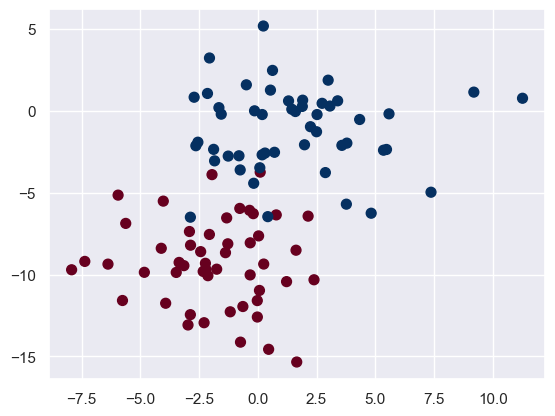

In [9]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples= 100, n_features = 2, centers = 2, random_state= 2, cluster_std= 2.5) 

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

We'll assume that the data is described by a Gaussian distribution with no covariance between dimensions. This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution.

In [10]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)

GaussianNB()

In [11]:
# generate some new data and predict the label

rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

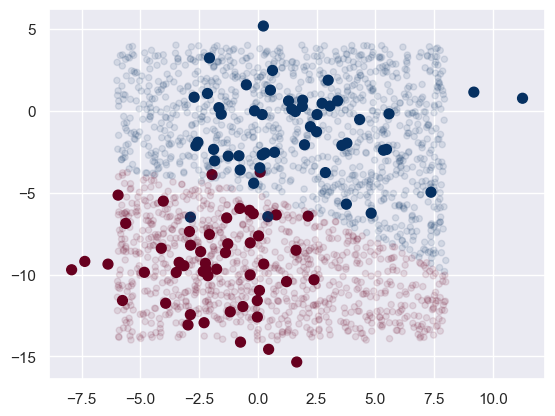

In [12]:
# Now we can plot this new data to get an idea of where the decision boundary is:

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [13]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.78, 0.22],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.96, 0.04],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.28, 0.72]])

Of course, the final classification will only be as good as the model assumptions that lead to it, which is why Gaussian naive Bayes often does not produce very good results. Still, in many cases—especially as the number of features becomes large—this assumption is not detrimental enough to prevent Gaussian naive Bayes from being a useful method.

### Multinomial Naive Bayes

The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribuiton with a best-fit multinomial distribution.

In [16]:
# Example: Classifying Text

from sklearn.datasets import fetch_20newsgroups

In [18]:
data = fetch_20newsgroups()

In [19]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [20]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [26]:
print(train.data[10])

From: mussack@austin.ibm.com (Christopher Mussack)
Subject: Re: Questioning Authority
Lines: 60

Despite my trendy, liberal, feminist tendencies and the fact
that I basically agree with what you are saying I will rebut:

(Dr Nancy's Sweetie) writes:
> (Chris Mussack) writes:
> > For all those people who insist I question authority: Why?
> ...
> Authorities sometimes tell people to do evil things.  People who "just
> follow orders" have tortured and killed others in very large numbers,
> and protest their innocence afterwards.
 
The basic question here is "how do I know what I am supposed to do?"
This is true in every situation that comes up. Some people do not
think about it at all and merely follow their impulses. I claim
that is just as dangerous as "following authority". I could site
sexually transmitted diseases, drug abuse, all manner of criminal
activity, the savings and loan scandal, car accidents, eggs thrown
at my house, all are examples of people not "following authority".
I 

In [27]:
# In order to use this data we need to be able to convert the content of each string into a vector of numbres
# We'll use the TF-IDF vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [28]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

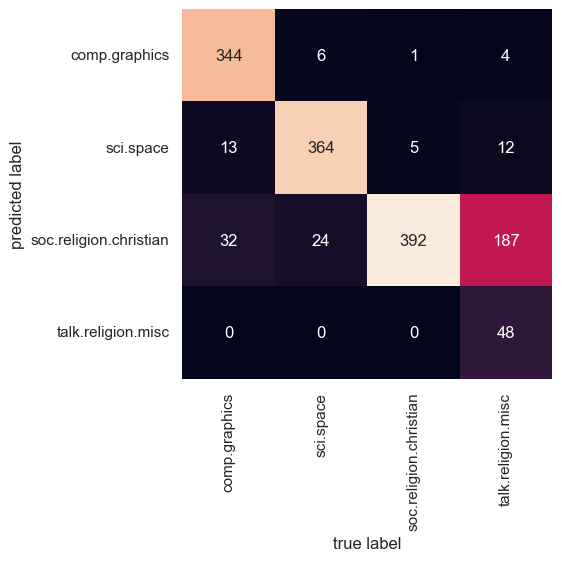

In [29]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [30]:
# we now have the tools to determine the category for any string
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [31]:
predict_category('sending a payload to the ISS')


'sci.space'

In [33]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [34]:
predict_category('determining the screen resolution')

'comp.graphics'